In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('bmh')

,Dist,Elev
564,388.481260,1314.714417
565,390.271794,1314.705518
566,391.056159,1314.691170
567,391.484290,1314.703104
568,391.822270,1314.614154


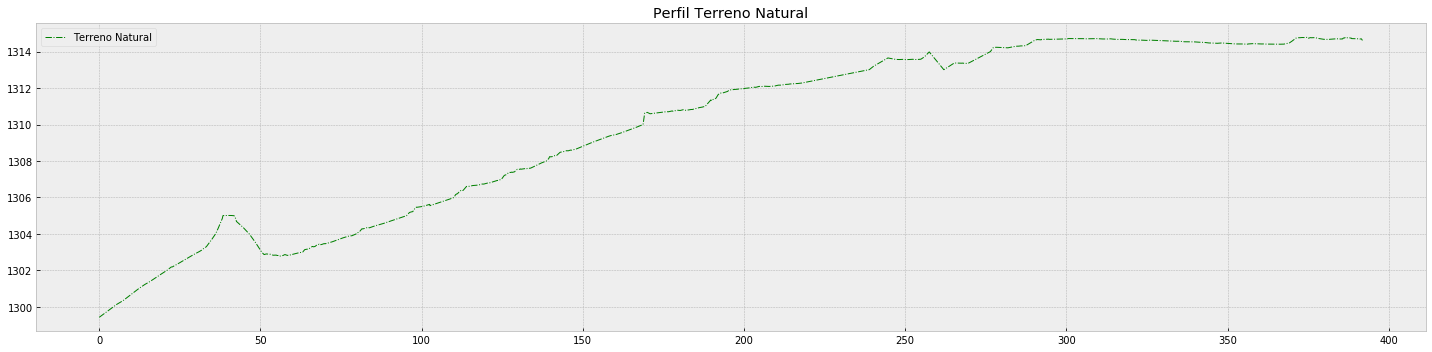

In [5]:
#fname = 'Profile_Analise'
fname = 'ProfilePoints'

df_Profile = pd.read_csv(fname + '.csv')

plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')

plt.legend()
plt.title('Perfil Terreno Natural')

plt.tight_layout()

df_Profile.tail()

## Calculo de Greide com Função Polynomial

In [6]:
Polynom = np.polyfit(df_Profile['Dist'], df_Profile['Elev'], np.floor(len(df_Profile['Dist']) * 0.05))
df_Profile['Greide'] = np.polyval(Polynom, df_Profile['Dist'])

df_Profile.tail()

c:\users\gomee11\documents\_apps\vscode\.python\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


,Dist,Elev,Greide
564,388.481260,1314.714417,1314.792018
565,390.271794,1314.705518,1314.790154
566,391.056159,1314.691170,1314.721122
567,391.484290,1314.703104,1314.652122
568,391.822270,1314.614154,1314.577172


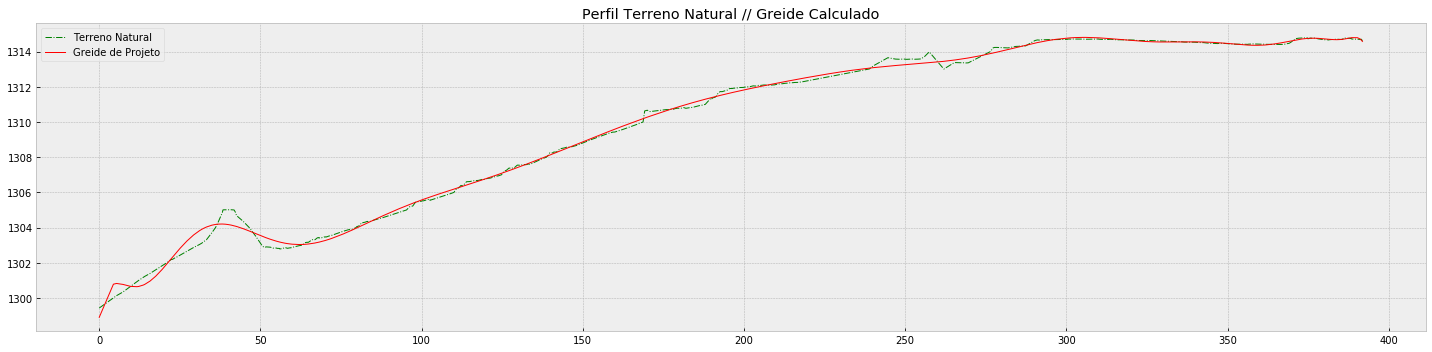

In [7]:
plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')
plt.plot(df_Profile['Dist'], df_Profile['Greide'], color='r', linewidth=1, label='Greide de Projeto')

plt.legend()
plt.title('Perfil Terreno Natural // Greide Calculado')

plt.tight_layout()

In [8]:
df_Profile[['Dist', 'Greide']].to_csv(fname + '_Greide.txt', sep=' ', index=False, header=False)

### Inclinação do Perfil
---

>Inclinacao = Desnivel / Distancia

In [6]:
df_Profile['Desnivel'] = df_Profile['Elev'] - df_Profile['Elev'].shift(1)
#df_Profile['Desnivel'] = df_Profile['Desnivel'].fillna(0)
df_Profile.tail()

,Dist,Elev,Greide,Desnivel
463,615.797484,828.000000,827.989052,0.481942
464,619.853189,828.748588,828.922615,0.748588
465,621.394361,829.000000,829.229484,0.251412
466,623.921466,829.396355,829.575574,0.396355
467,626.526724,829.800604,829.549826,0.404249


In [7]:
df_Profile['Inclinacao TN'] = (df_Profile['Desnivel'] / df_Profile['Dist'])
#df_Profile['Inclinacao TN'] = df_Profile['Inclinacao TN'].fillna(0)
df_Profile.head()

,Dist,Elev,Greide,Desnivel,Inclinacao TN
0,0.000000,770.424409,770.914284,NaN,NaN
1,0.902825,771.367256,771.063568,0.942847,1.044330
2,0.937119,771.368566,771.068738,0.001310,0.001398
3,3.910769,771.430308,771.400394,0.061742,0.015788
4,10.089751,771.461696,771.612303,0.031388,0.003111


In [8]:
inc = 0.08

tag_Elv = 'Elev ' + str(inc * 100) + '%'
tag_Inc = 'Inc ' + str(inc * 100) + '%'
tag_Des = 'Desnivel ' + str(inc * 100) + '%'

df_Profile[tag_Elv] = np.where(df_Profile['Inclinacao TN'] >= inc,
                               np.where(df_Profile['Desnivel'] > 0,
                                        df_Profile['Elev'] - (df_Profile['Desnivel'] - df_Profile['Desnivel'] * inc),
                                        df_Profile['Elev'] + (df_Profile['Desnivel'] - df_Profile['Desnivel'] * (- inc))
                                       ),
                               df_Profile['Elev']
                              )

df_Profile[tag_Des] = df_Profile[tag_Elv] - df_Profile[tag_Elv].shift(1)
df_Profile[tag_Inc] = (df_Profile[tag_Des] / df_Profile['Dist'])
df_Profile.head()

#df_Profile[['Elev', tag_Elv, 'Inclinacao TN', tag_Inc]]

,Dist,Elev,Greide,Desnivel,Inclinacao TN,Elev 8.0%,Desnivel 8.0%,Inc 8.0%
0,0.000000,770.424409,770.914284,NaN,NaN,770.424409,NaN,NaN
1,0.902825,771.367256,771.063568,0.942847,1.044330,770.499837,0.075428,0.083546
2,0.937119,771.368566,771.068738,0.001310,0.001398,771.368566,0.868729,0.927021
3,3.910769,771.430308,771.400394,0.061742,0.015788,771.430308,0.061742,0.015788
4,10.089751,771.461696,771.612303,0.031388,0.003111,771.461696,0.031388,0.003111
